In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
data=pd.DataFrame(housing.data)

In [8]:
data.columns=housing.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
data['PRICE']=housing.target

In [12]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [14]:
x=data.drop(['PRICE'],axis=1)
y=data['PRICE']

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [20]:
model=lm.fit(xtrain,ytrain)

In [22]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)

In [24]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
mse=mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error : {mse}")

Mean Squared Error : 0.5289841670367224


In [42]:
print("Model coefficient: ",lm.coef_)
print("Model intercept: ",lm.intercept_)

Model coefficient:  [ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]
Model intercept:  -36.85856910680127


[]

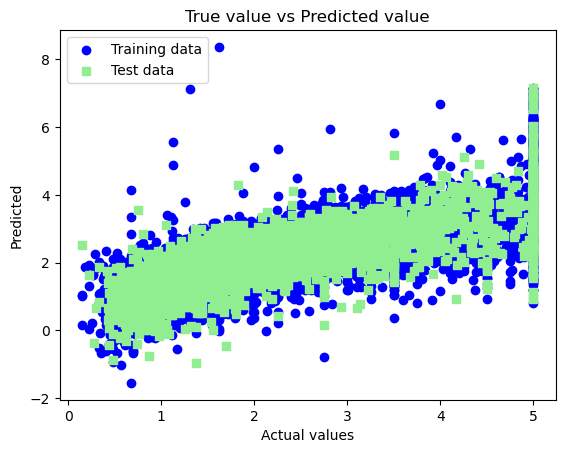

In [40]:
plt.scatter(ytrain, ytrain_pred,c='blue',marker='o', label='Training data')
plt.scatter(ytest,ytest_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
